In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator ,TransformerMixin

from mypipes1 import*

In [2]:
train_file = r'C:\Users\Mudassir\Desktop\DS Classes\data\data\loan_data_train.csv'
test_file = r'C:\Users\Mudassir\Desktop\DS Classes\data\data\loan_data_test.csv'

ld_train = pd.read_csv(r'C:\Users\Mudassir\Desktop\DS Classes\data\data\loan_data_train.csv')
ld_test =  pd.read_csv(r'C:\Users\Mudassir\Desktop\DS Classes\data\data\loan_data_test.csv')

In [3]:
p1 = pdPipeline([
    
    ('var_select',VarSelector(['Amount.Requested','Amount.Funded.By.Investors','Open.CREDIT.Lines','Revolving.CREDIT.Balance'])),
    
    ('convert_to_numeric',convert_to_numeric()),
    
     ('missing_trt',DataFrameImputer())
        
    
]

)

p2 = pdPipeline([
    
    ('var_select',VarSelector(['Debt.To.Income.Ratio'])),
    
    ('string_clean',string_clean(replace_it='%' , replace_with='')),
    
     ('convert_to_numeric',convert_to_numeric()),
    
     ('missing_trt',DataFrameImputer())
        
    
]

)

p3 = pdPipeline([
    
    ('var_select',VarSelector(['Loan.Length','Loan.Purpose','State','Home.Ownership','Employment.Length'])),
     
     ('missing_trt',DataFrameImputer()),
    
     ('create_dummies',get_dummies_Pipe(20))
    
        
    
]

)

p4 = pdPipeline([
    
    ('var_select',VarSelector(['Monthly.Income','Inquiries.in.the.Last.6.Months'])),
     
     ('missing_trt',DataFrameImputer())
    
    
    
        
    
]

)

p5 = pdPipeline([
    
    ('var_select',VarSelector(['FICO.Range'])),
     
     ('missing_trt',DataFrameImputer()),
    
     ('custom_fico',custom_fico())
    
      
]

)

data_pipe = FeatureUnion([
    
  ('obj_to_num',p1)  ,
      ('dtir',p2) ,
      ('obj_to_dum',p3) ,
      ('num',p4) ,
      ('fico',p5)    
    
])


In [4]:
modified_x = data_pipe.fit_transform(ld_train)



In [5]:
# Get feature names using get_feature_names_out
feature_names = data_pipe.get_feature_names_out()



In [6]:
# Create DataFrame with modified_x and feature_names
x_train = pd.DataFrame(data=modified_x, columns=feature_names)

In [7]:
x_train

,obj_to_num__Amount.Requested,obj_to_num__Amount.Funded.By.Investors,obj_to_num__Open.CREDIT.Lines,obj_to_num__Revolving.CREDIT.Balance,dtir__Debt.To.Income.Ratio,obj_to_dum__Loan.Length_36 months,obj_to_dum__Loan.Length_60 months,obj_to_dum__Loan.Purpose_debt_consolidation,obj_to_dum__Loan.Purpose_credit_card,obj_to_dum__Loan.Purpose_other,...,obj_to_dum__Employment.Length_4 years,obj_to_dum__Employment.Length_1 year,obj_to_dum__Employment.Length_6 years,obj_to_dum__Employment.Length_7 years,obj_to_dum__Employment.Length_8 years,obj_to_dum__Employment.Length_missing,obj_to_dum__Employment.Length_9 years,num__Monthly.Income,num__Inquiries.in.the.Last.6.Months,fico__fico
0,25000.0,25000.00,11.0,15210.0,27.56,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8606.56,3.0,722.0
1,19750.0,19750.00,14.0,19070.0,13.39,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6737.50,3.0,712.0
2,2100.0,2100.00,13.0,893.0,3.50,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.00,1.0,692.0
3,28000.0,28000.00,12.0,38194.0,19.62,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7083.33,1.0,712.0
4,24250.0,17431.82,6.0,31061.0,23.79,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5833.33,2.0,732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,16.0,17969.0,12.10,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7083.33,1.0,677.0
2196,4200.0,4200.00,4.0,5718.0,14.16,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3850.00,0.0,702.0
2197,19800.0,19775.00,10.0,46879.0,15.03,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6666.67,3.0,677.0
2198,18000.0,18000.00,5.0,32394.0,11.63,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9051.83,2.0,672.0


In [8]:
ld_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [9]:
#Creating the Y train data 

y_train = pd.to_numeric(ld_train['Interest.Rate'].str.replace('%', ''), errors='coerce')

In [10]:
print(y_train)

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest.Rate, Length: 2200, dtype: float64


In [11]:
y_train.head(12)

0     18.49
1     17.27
2     14.33
3     16.29
4     12.23
5      8.90
6     22.47
7      7.51
8     12.99
9      7.62
10    10.16
11     9.99
Name: Interest.Rate, dtype: float64

In [12]:
#Creating the subset of x_train ie x_test



In [13]:
from sklearn.model_selection import train_test_split

# Assuming x_train is your DataFrame or array with features
# Adjust the test_size parameter to set the ratio of training to testing data

x_train1, x_test, _, _ = train_test_split(x_train, x_train, test_size=0.2, random_state=42)

# The resulting x_train1 will have 80% of the data, and x_test will have 20%.

In [14]:
x_train1

,obj_to_num__Amount.Requested,obj_to_num__Amount.Funded.By.Investors,obj_to_num__Open.CREDIT.Lines,obj_to_num__Revolving.CREDIT.Balance,dtir__Debt.To.Income.Ratio,obj_to_dum__Loan.Length_36 months,obj_to_dum__Loan.Length_60 months,obj_to_dum__Loan.Purpose_debt_consolidation,obj_to_dum__Loan.Purpose_credit_card,obj_to_dum__Loan.Purpose_other,...,obj_to_dum__Employment.Length_4 years,obj_to_dum__Employment.Length_1 year,obj_to_dum__Employment.Length_6 years,obj_to_dum__Employment.Length_7 years,obj_to_dum__Employment.Length_8 years,obj_to_dum__Employment.Length_missing,obj_to_dum__Employment.Length_9 years,num__Monthly.Income,num__Inquiries.in.the.Last.6.Months,fico__fico
1656,6000.0,6000.00,9.0,8230.0,12.98,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.00,0.0,667.0
752,15000.0,15000.00,5.0,5355.0,7.29,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7916.67,1.0,677.0
892,8000.0,7997.79,8.0,7374.0,15.76,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3750.00,1.0,667.0
1041,16450.0,16400.00,23.0,12670.0,25.59,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2833.33,2.0,672.0
1179,12000.0,11854.04,3.0,7956.0,4.62,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4500.00,0.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,10000.0,10000.00,8.0,8404.0,8.40,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4500.00,1.0,712.0
1095,14075.0,14075.00,6.0,13036.0,12.96,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3033.33,0.0,692.0
1130,10000.0,9325.00,10.0,3248.0,6.25,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6666.67,0.0,752.0
1294,8000.0,7975.00,10.0,4455.0,18.38,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4250.00,0.0,757.0


In [15]:
x_test

,obj_to_num__Amount.Requested,obj_to_num__Amount.Funded.By.Investors,obj_to_num__Open.CREDIT.Lines,obj_to_num__Revolving.CREDIT.Balance,dtir__Debt.To.Income.Ratio,obj_to_dum__Loan.Length_36 months,obj_to_dum__Loan.Length_60 months,obj_to_dum__Loan.Purpose_debt_consolidation,obj_to_dum__Loan.Purpose_credit_card,obj_to_dum__Loan.Purpose_other,...,obj_to_dum__Employment.Length_4 years,obj_to_dum__Employment.Length_1 year,obj_to_dum__Employment.Length_6 years,obj_to_dum__Employment.Length_7 years,obj_to_dum__Employment.Length_8 years,obj_to_dum__Employment.Length_missing,obj_to_dum__Employment.Length_9 years,num__Monthly.Income,num__Inquiries.in.the.Last.6.Months,fico__fico
1451,9600.0,9600.0,9.0,44403.0,20.58,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3833.33,1.0,707.0
1334,5000.0,5000.0,14.0,5957.0,28.51,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.00,2.0,692.0
1761,32000.0,32000.0,8.0,16174.0,15.14,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7055.00,1.0,727.0
1735,9250.0,9250.0,10.0,5440.0,29.46,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3333.33,0.0,687.0
1576,20000.0,19900.0,5.0,6011.0,12.58,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2416.67,0.0,762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,15000.0,15000.0,9.0,17264.0,13.34,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4333.33,0.0,672.0
71,5000.0,5000.0,5.0,1620.0,5.26,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2416.67,0.0,667.0
1908,10000.0,10000.0,11.0,9059.0,28.91,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3500.00,1.0,662.0
1958,3000.0,3000.0,9.0,7321.0,4.75,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4166.67,3.0,712.0


In [16]:
#Splitting the y_train dataset 

from sklearn.model_selection import train_test_split

# Assuming y_train is your target variable
# Adjust the test_size parameter to set the ratio of training to testing data

y_train1, y_test = train_test_split(y_train, test_size=0.2, random_state=42)

# The resulting y_train1 will have 80% of the data, and y_test will have 20%.

In [17]:
y_train1

1656    13.99
752     16.77
892     16.29
1041    21.97
1179    14.74
        ...  
1638    11.71
1095    18.75
1130     8.32
1294     6.03
860     14.33
Name: Interest.Rate, Length: 1760, dtype: float64

In [18]:
y_test

1451    11.14
1334    14.33
1761    16.29
1735    12.12
1576    10.62
        ...  
59      17.77
71      15.99
1908    17.27
1958     9.91
482     20.49
Name: Interest.Rate, Length: 440, dtype: float64

In [19]:
#Calling out the dependant libraries 

from sklearn.linear_model import LinearRegression 

In [20]:
lm = LinearRegression()
lm.fit(x_train1,y_train1)

LinearRegression()

In [21]:
lm.intercept_    #Value of the intercept 

73.30452612454877

In [22]:
lm.coef_         #Relation of each column or slope with respect to the target variable

array([ 5.46922102e-05,  1.13945633e-04, -3.75693178e-02, -2.50950646e-06,
       -2.47316200e-03,  1.24184996e+00,  4.45189621e+00, -8.94834874e-01,
       -9.59638335e-01, -9.73093920e-02, -9.25854482e-01, -4.73471096e-01,
       -1.47646465e-01, -7.50064174e-01, -1.62250483e+00, -9.86718411e-01,
        7.93864179e-01, -2.72415896e-01, -9.11209972e-02, -6.91881017e-02,
        6.06190905e-01, -4.99503220e-01, -5.42262361e-01, -7.31906533e-02,
       -2.49945747e-01, -1.22252941e-01, -1.46834471e-01, -2.15718126e-01,
       -7.59039501e-02, -5.91674930e-01, -3.81230362e-02, -1.50728652e-01,
        6.04190619e-01,  4.97089289e-01, -3.05319884e-01, -1.79930674e-01,
       -2.60628308e-01, -3.84753512e-01, -2.98598542e-01,  4.75454106e-02,
        1.23544529e-01,  2.00778452e-01,  4.41653427e-01, -2.38549292e+00,
       -2.21164856e+00, -1.95683165e+00,  6.05878298e-01,  4.24899801e-01,
        3.76481836e-01,  2.26798938e-01,  7.54649735e-01,  5.25871193e-01,
        4.28175655e-01,  

In [52]:
#Creating a dataset of the sorted values of the coefficients

lm_coeff_df = pd.DataFrame(list(zip(x_train.columns,lm.coef_)),columns=['Feature','Value'])


In [54]:
#Creating the sorted values table 

lm_coeff_df.sort_values(['Value'],ascending=False)

,Feature,Value
6,obj_to_dum__Loan.Length_60 months,4.451896
5,obj_to_dum__Loan.Length_36 months,1.241850
16,obj_to_dum__Loan.Purpose_moving,0.793864
50,obj_to_dum__Employment.Length_5 years,0.754650
56,obj_to_dum__Employment.Length_missing,0.701218
...,...,...
15,obj_to_dum__Loan.Purpose_medical,-0.986718
14,obj_to_dum__Loan.Purpose_wedding,-1.622505
45,obj_to_dum__Home.Ownership_OWN,-1.956832
44,obj_to_dum__Home.Ownership_RENT,-2.211649


In [23]:
predicted_val = lm.predict(x_test)

In [24]:
predicted_val   #Predictions given by the software 

array([11.75811802, 12.49437618, 17.82799114, 13.9619098 ,  8.55628279,
       15.02106172, 12.74902869,  7.98741793, 19.96255591, 11.09002687,
        6.32718759, 15.49889984, 13.40834186, 14.77789178, 12.84965676,
       11.25388642,  9.12866443, 13.74387752, 17.0503603 ,  6.06571433,
       13.62762032,  7.40155844, 15.04162712, 17.36230231, 20.36163048,
       13.28267305,  5.89463209, 13.795742  ,  8.80673405, 12.6992697 ,
        6.9389377 , 14.10165648, 11.51490731, 15.02984161, 10.32013598,
       15.76712726, 13.33740312,  3.34634268, 21.29480427, 13.33238544,
       13.62261078, 11.03234231, 10.97664935, 14.43206457, 17.75765033,
        9.6117848 ,  8.99560642, 15.17398566, 14.92437428, 15.08741503,
       15.83134169, 18.34537401, 12.06861947, 14.90508681, 16.96249887,
       12.1856309 , 12.43089647, 16.80445787, 17.69173698, 10.89649946,
       11.59727084, 16.56465174,  8.75434346, 10.80047487, 17.12334444,
        8.82381121,  8.33189778, 14.5648925 ,  7.9976891 , 10.65

In [25]:
#Doing cross validation on the data

from sklearn.model_selection import cross_val_score

cv_mae = cross_val_score(lm,x_train1,y_train1,cv=10,scoring='neg_mean_absolute_error')

In [26]:
cv_mae

array([-1.55033997, -1.55166312, -1.67504574, -1.55155794, -1.63947775,
       -1.61368277, -1.68402742, -1.61963893, -1.77241769, -1.60172403])

In [27]:
#Calculating the performance of the model based on the actual calculated values and the predicted values 

from sklearn.metrics import r2_score 
r2_score(y_test,predicted_val)

0.7523203878280207

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

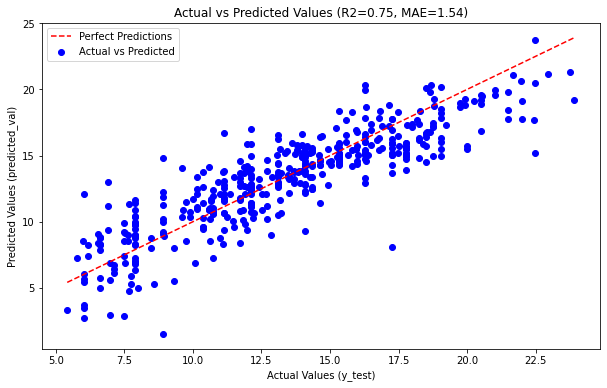

In [29]:
#Making a graph to to visually show the accuracy of the prediction 

# Calculate R-squared and MAE for evaluation
r2 = r2_score(y_test, predicted_val)
mae = mean_absolute_error(y_test, predicted_val)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, predicted_val, color='blue', label='Actual vs Predicted')

# Diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

plt.title(f'Actual vs Predicted Values (R2={r2:.2f}, MAE={mae:.2f})')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (predicted_val)')
plt.legend()
plt.show()

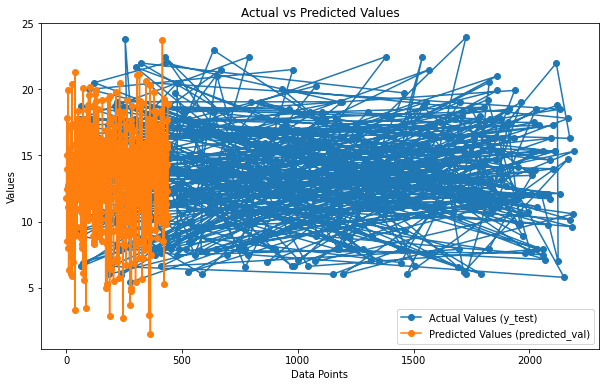

In [30]:
# Plotting the predicted values against the actual values
plt.figure(figsize=(10, 6))

# Line plot of actual vs predicted
plt.plot(y_test, label='Actual Values (y_test)', marker='o')
plt.plot(predicted_val, label='Predicted Values (predicted_val)', marker='o')

plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [31]:
#Calling the dependant Libraries 

from sklearn.linear_model import Ridge , Lasso 
from sklearn.model_selection import GridSearchCV 

In [32]:
#Selecting the range for the lambdas 

lambdas = np.linspace(1,100,100)


In [33]:
lambdas 

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [34]:
params = {'alpha':lambdas}

In [35]:
model= Ridge(fit_intercept=True)

In [36]:
#Selecting the regression method 

#Grid Regression 

grid_search = GridSearchCV(model,
                          param_grid=params,
                           cv=10,
                           scoring='neg_mean_absolute_error',
                           verbose=20,
                           n_jobs=-1
                          
                          )

In [37]:
#Fitting the model with the training set 

grid_search.fit(x_train1,y_train1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [38]:
#Estimating the best model 

grid_search.best_estimator_

Ridge(alpha=38.0)

In [39]:
grid_search.cv_results_

{'mean_fit_time': array([0.07625954, 0.01753552, 0.01724334, 0.01268911, 0.01386116,
        0.0173511 , 0.02072046, 0.01523209, 0.01838803, 0.01692383,
        0.01790051, 0.02356956, 0.01489058, 0.01802239, 0.01889644,
        0.01562319, 0.01500401, 0.01813667, 0.01578686, 0.0164691 ,
        0.01571033, 0.0137131 , 0.01243384, 0.0127213 , 0.01577594,
        0.01281521, 0.01214876, 0.01310916, 0.01145663, 0.01168475,
        0.01138141, 0.01152735, 0.0107527 , 0.01237345, 0.01040859,
        0.01051743, 0.01272485, 0.01108792, 0.01204023, 0.0106457 ,
        0.0114006 , 0.01189208, 0.01264522, 0.01106663, 0.01111722,
        0.01098096, 0.01219196, 0.01209173, 0.01302586, 0.01262448,
        0.01399083, 0.01499221, 0.0151485 , 0.01797154, 0.01834006,
        0.01516151, 0.01762445, 0.02013597, 0.01671314, 0.01565762,
        0.0171443 , 0.01696854, 0.01910427, 0.01547279, 0.01960008,
        0.01627352, 0.01409361, 0.01205285, 0.01465595, 0.01179793,
        0.01166198, 0.01209998,

In [40]:
#Getting the top 5 models to execute 

def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Assuming 'report' function is defined, you can use it like this:
report(grid_search.cv_results_, 5)

Model with rank: 1
Mean validation score: -1.61103 (std: 0.07622)
Parameters: {'alpha': 38.0}

Model with rank: 2
Mean validation score: -1.61103 (std: 0.07629)
Parameters: {'alpha': 39.0}

Model with rank: 3
Mean validation score: -1.61103 (std: 0.07636)
Parameters: {'alpha': 40.0}

Model with rank: 4
Mean validation score: -1.61104 (std: 0.07615)
Parameters: {'alpha': 37.0}

Model with rank: 5
Mean validation score: -1.61104 (std: 0.07643)
Parameters: {'alpha': 41.0}



In [41]:
#Transferring the final selected model to the object and then fitting the traiing data with the final selected model 

ridge_model = grid_search.best_estimator_

In [42]:
ridge_model.fit(x_train1,y_train1)

Ridge(alpha=38.0)

In [43]:
#Making aa list of the columns and their coefficients 

ridge_coefficient_df = pd.DataFrame(list(zip(x_train1.columns,ridge_model.coef_)),columns=['Feature','Value'])

In [44]:
ridge_coefficient_df

,Feature,Value
0,obj_to_num__Amount.Requested,0.000060
1,obj_to_num__Amount.Funded.By.Investors,0.000113
2,obj_to_num__Open.CREDIT.Lines,-0.038481
3,obj_to_num__Revolving.CREDIT.Balance,-0.000003
4,dtir__Debt.To.Income.Ratio,-0.004240
...,...,...
56,obj_to_dum__Employment.Length_missing,0.119686
57,obj_to_dum__Employment.Length_9 years,-0.126029
58,num__Monthly.Income,-0.000031
59,num__Inquiries.in.the.Last.6.Months,0.368935


In [45]:
ridge_coefficient_df.sort_values(['Value'],ascending=False)

,Feature,Value
6,obj_to_dum__Loan.Length_60 months,1.552185
20,obj_to_dum__State_TX,0.507370
16,obj_to_dum__Loan.Purpose_moving,0.454606
59,num__Inquiries.in.the.Last.6.Months,0.368935
9,obj_to_dum__Loan.Purpose_other,0.350509
...,...,...
22,obj_to_dum__State_IL,-0.312949
7,obj_to_dum__Loan.Purpose_debt_consolidation,-0.344369
8,obj_to_dum__Loan.Purpose_credit_card,-0.381216
14,obj_to_dum__Loan.Purpose_wedding,-0.442363


In [46]:
#Making the prediction on the final selected model 

In [59]:
test_pred_ridge=ridge_model.predict(x_test)

In [48]:
test_pred_ridge

array([12.02414645, 12.59195942, 17.44344176, 13.80960185,  8.74010292,
       15.06913858, 12.83516764,  8.1793487 , 19.40085534, 11.1932856 ,
        6.50922196, 15.57218977, 13.70055349, 14.88492558, 13.00231917,
       11.27477455,  9.21633404, 13.85578174, 16.39150443,  6.15993851,
       13.72074171,  7.52079006, 14.53606037, 17.31762296, 20.2857809 ,
       13.34646204,  5.773683  , 13.79073411,  9.00875223, 12.82449786,
        7.18416042, 14.07260664, 11.5796928 , 12.95258796, 10.38609812,
       15.45131882, 13.49558696,  3.58336098, 21.20388232, 13.40992609,
       13.71377212, 11.2133478 , 11.13983236, 14.53204162, 17.83151763,
        9.90091812,  9.04180222, 14.96304575, 14.97800486, 15.24191557,
       15.92274335, 18.59701085, 12.11291178, 14.84603817, 17.01311148,
       12.87422521, 12.39052035, 16.69901371, 17.61134914, 10.97133945,
       11.67159525, 16.40144047,  8.56053953, 10.90496495, 17.23290441,
        8.93757442,  9.21985093, 14.25671451,  8.10029088, 11.35

In [49]:
#Calculating the performance of the model based on the actual calculated values and the predicted values 

from sklearn.metrics import r2_score 
r2_score(y_test,test_pred)

0.7611908957570582

In [55]:
#Comparing the values of the coefficients of the designated columns 

#Coefficient values for the table in which only simple Linear Regression was applied without any optimization 

lm_coeff_df.sort_values(['Value'],ascending=False)



,Feature,Value
6,obj_to_dum__Loan.Length_60 months,4.451896
5,obj_to_dum__Loan.Length_36 months,1.241850
16,obj_to_dum__Loan.Purpose_moving,0.793864
50,obj_to_dum__Employment.Length_5 years,0.754650
56,obj_to_dum__Employment.Length_missing,0.701218
...,...,...
15,obj_to_dum__Loan.Purpose_medical,-0.986718
14,obj_to_dum__Loan.Purpose_wedding,-1.622505
45,obj_to_dum__Home.Ownership_OWN,-1.956832
44,obj_to_dum__Home.Ownership_RENT,-2.211649


In [56]:
#Coefficient Values where Ridge Regression is applied 

ridge_coefficient_df.sort_values(['Value'],ascending=False)

,Feature,Value
6,obj_to_dum__Loan.Length_60 months,1.552185
20,obj_to_dum__State_TX,0.507370
16,obj_to_dum__Loan.Purpose_moving,0.454606
59,num__Inquiries.in.the.Last.6.Months,0.368935
9,obj_to_dum__Loan.Purpose_other,0.350509
...,...,...
22,obj_to_dum__State_IL,-0.312949
7,obj_to_dum__Loan.Purpose_debt_consolidation,-0.344369
8,obj_to_dum__Loan.Purpose_credit_card,-0.381216
14,obj_to_dum__Loan.Purpose_wedding,-0.442363


In [57]:
#Here we can see that the values have been compensated in the Ridge Regression method giving us a more better 
#model with accurate answers 

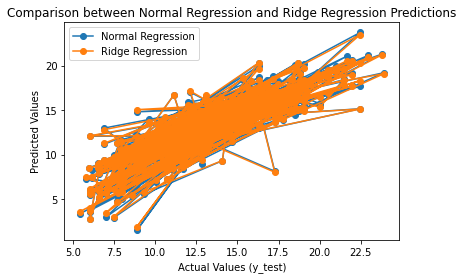

In [61]:
#Creating a comparision graph of the predicted values in the normal Regression vs Ridge Regression 

# test_pred_ridge  (Predicted Values through Ridge Regression)
# predicted_val     (Predicted Values through normal Regression)


import matplotlib.pyplot as plt

# Assuming you have the following datasets
# y_test: Actual values
# predicted_val: Predicted values from normal regression
# test_pred_ridge: Predicted values from Ridge regression

# Create a line plot for normal regression
plt.plot(y_test, predicted_val, label='Normal Regression', marker='o')

# Create a line plot for Ridge regression
plt.plot(y_test, test_pred_ridge, label='Ridge Regression', marker='o')

# Set labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Comparison between Normal Regression and Ridge Regression Predictions')

# Display a legend
plt.legend()

# Show the plot
plt.show()

In [62]:
#Calculating for Randomization method in Ridge Regression

#Importing the demendant libraries 

from sklearn.model_selection import RandomizedSearchCV 

In [66]:
#Creating the randomized model 

grid_search_random = RandomizedSearchCV(model, params,
                                        cv=10,
                                        scoring='neg_mean_absolute_error',  # Use '=' instead of '-'
                                        verbose=20,
                                        n_jobs=-1)  # Use '=' instead of '-'

In [67]:
#Fitting the model with the training set 

grid_search_random.fit(x_train1,y_train1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
                   scoring='neg_mean_absolute_error', verbose=20)

In [69]:
#Estimating the best model 

grid_search_random.best_estimator_

grid_search.cv_results_

report(grid_search.cv_results_,5)  #For showing the top 5 models

Model with rank: 1
Mean validation score: -1.61103 (std: 0.07622)
Parameters: {'alpha': 38.0}

Model with rank: 2
Mean validation score: -1.61103 (std: 0.07629)
Parameters: {'alpha': 39.0}

Model with rank: 3
Mean validation score: -1.61103 (std: 0.07636)
Parameters: {'alpha': 40.0}

Model with rank: 4
Mean validation score: -1.61104 (std: 0.07615)
Parameters: {'alpha': 37.0}

Model with rank: 5
Mean validation score: -1.61104 (std: 0.07643)
Parameters: {'alpha': 41.0}



In [70]:
#Predicting the values using the using the best model 

test_pred_random = grid_search_random.predict(x_test)

In [71]:
#Calculating the performance of the model 


from sklearn.metrics import r2_score 
r2_score(y_test,test_pred_random)

0.7590432710313579

In [72]:
#Arranging al the coefficients and in the form of a sorted table for comparison with the simple regression.
#Same as above step

In [ ]:
#LASSO REGRESSION 